Data can have missing values due to a number of reasons. It's important to analyze your data, and get a sense of the missing values so you can decide how to handle the missing values for your machine learning. Let's start by looking at the *[Pima Indian Diabetes Prediction](https://www.kaggle.com/uciml/pima-indians-diabetes-database)* dataset.

In [1]:
# import packages we need for exploratory data analysis (EDA)
import pandas as pd # to store tabular data
import numpy as np # to do some math
import matplotlib.pyplot as plt # a popular data visualization tool
import seaborn as sns # another popular data visualization tool
%matplotlib inline
plt.style.use('fivethirtyeight') # a popular data visualization theme

In [3]:
# load in our dataset using pandas
pima = pd.read_csv('./data/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 768 instances (rows). This dataset is used to predict the onset of diabetes within five years in females of Pima Indian heritage over the age of 21. 

This dataset is meant to correspond with a binary (2-class) classification model (*i.e. will this person develop diabetes within 5 years*).

Here is a description of the columns:
1. Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skinfold thickness (mm)
* 2-Hour serum insulin measurement (mu U/ml)
* Body mass index (weight in kg/(height in m)2)
* Diabetes pedigree function
* Age (years)
* Class variable (zero or one): onset diabetes

The goal of this dataset is to predict the final column of onset diabetes, using the 8 features as inputs for the machine learning function. Let's start by doing some basic stats, selections and visualizations.

In [6]:
pima['Outcome'].value_counts(normalize=True)
#get null accuracy, 65% did not develop diabetes

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Let's now exploit some patterns in our data by visualizing some differences between those that develop diabetes and those that do not.

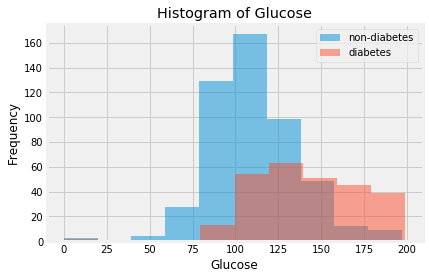

In [7]:
# get a histogram of hte plasma_glucose_concentration column 
# for both classes

col = 'Glucose'
plt.hist(pima[pima['Outcome']==0][col], 10, alpha=0.5, label='non-diabetes')
plt.hist(pima[pima['Outcome']==1][col], 10, alpha=0.5, label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

This histogram is showing a difference between *plasma_glucose_concentration* regarding the two prediction classes. Now let's use the same histogram layout for some of the other featurs in the dataset.

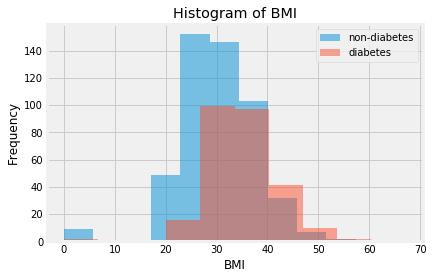

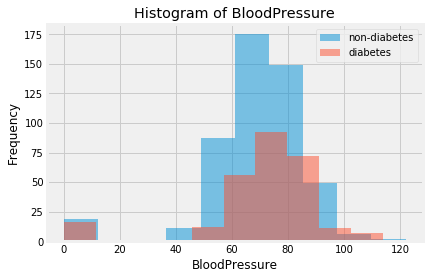

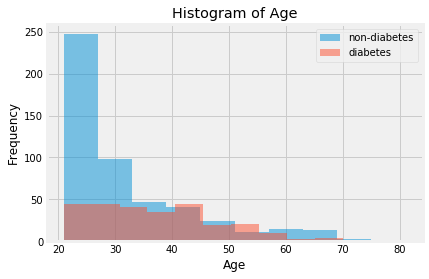

In [10]:
# using same histogram format above
# placing the code in a for-loop
# create a histogram for each item in the col variable

for col in ['BMI', 'BloodPressure', 'Age']:
    plt.hist(pima[pima['Outcome']==0][col], 10, alpha=0.5, label='non-diabetes')
    plt.hist(pima[pima['Outcome']==1][col], 10, alpha=0.5, label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()